<a href="https://colab.research.google.com/github/Abhishek264/ml-bootcamp/blob/main/mlsvmday13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/datasets_586_1114_zoo.csv")

In [3]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
data.shape

(101, 18)

In [5]:
data.info

<bound method DataFrame.info of     animal_name  hair  feathers  eggs  ...  tail  domestic  catsize  class_type
0      aardvark     1         0     0  ...     0         0        1           1
1      antelope     1         0     0  ...     1         0        1           1
2          bass     0         0     1  ...     1         0        0           4
3          bear     1         0     0  ...     0         0        1           1
4          boar     1         0     0  ...     1         0        1           1
..          ...   ...       ...   ...  ...   ...       ...      ...         ...
96      wallaby     1         0     0  ...     1         0        1           1
97         wasp     1         0     1  ...     0         0        0           6
98         wolf     1         0     0  ...     1         0        1           1
99         worm     0         0     1  ...     0         0        0           7
100        wren     0         1     1  ...     1         0        0           2

[101 ro

In [6]:
data.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [7]:
data['animal_name'].nunique()

100

In [9]:
data.drop(['animal_name'],axis=1,inplace=True)

In [10]:
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
data['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


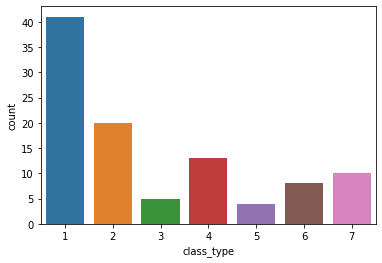

In [12]:
sns.countplot(data['class_type'])

In [13]:
class_1=data[data['class_type']==1]

In [14]:
class_1.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [15]:
#split x and y variables as independent and dependent variables 
x=data.drop(['class_type'],axis=1)
y=data['class_type']


In [16]:
#split into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
y_train.unique()

array([3, 1, 2, 4, 6, 7, 5])

In [18]:
y_test.unique()

array([5, 4, 1, 2, 7, 6])

In [20]:
#build svm algorithm
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
tr_predict=model.predict(x_train)

In [22]:
ts_predict=model.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score
print('Training score:',accuracy_score(y_train,tr_predict))
print('Testing score:',accuracy_score(y_test,ts_predict))

Training score: 0.9625
Testing score: 1.0


In [25]:
from sklearn.model_selection import cross_val_score
svc_model=SVC()

In [26]:
model_cv=cross_val_score(svc_model,x,y,cv=4)
model_cv

array([0.92307692, 0.96      , 0.92      , 0.88      ])

In [27]:
model_cv.mean()

0.9207692307692308

In [29]:
svc_c=SVC(C=10)

In [30]:
model_cv=cross_val_score(svc_c,x,y,cv=4)

In [31]:
model_cv

array([0.96153846, 1.        , 0.92      , 0.96      ])

In [32]:
model_cv.mean()

0.9603846153846154

In [33]:
svc_c=SVC(C=10,kernel='linear')
model_cv=cross_val_score(svc_c,x,y,cv=4)


In [34]:
model_cv

array([0.96153846, 1.        , 0.88      , 0.88      ])

In [35]:
model_cv.mean()

0.9303846153846154